# 2. Consuming data using Kafka <a class="anchor" id="1"></a>

<IPython.core.display.Javascript object>


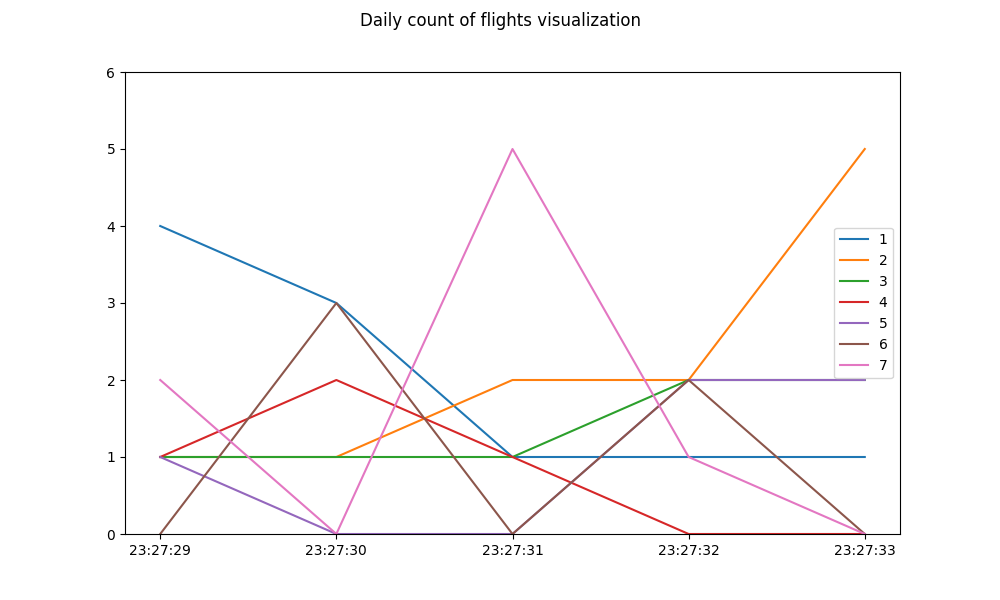

Timestamp 23:26:28
Day of Week  1  count:  3
Day of Week  2  count:  1
Day of Week  3  count:  0
Day of Week  4  count:  2
Day of Week  5  count:  1
Day of Week  6  count:  0
Day of Week  7  count:  3
----------------------------------------
Timestamp 23:26:29
Day of Week  1  count:  3
Day of Week  2  count:  1
Day of Week  3  count:  1
Day of Week  4  count:  2
Day of Week  5  count:  3
Day of Week  6  count:  0
Day of Week  7  count:  0
----------------------------------------
Timestamp 23:26:30
Day of Week  1  count:  1
Day of Week  2  count:  3
Day of Week  3  count:  2
Day of Week  4  count:  1
Day of Week  5  count:  1
Day of Week  6  count:  1
Day of Week  7  count:  1
----------------------------------------
Timestamp 23:26:31
Day of Week  1  count:  2
Day of Week  2  count:  3
Day of Week  3  count:  0
Day of Week  4  count:  1
Day of Week  5  count:  1
Day of Week  6  count:  1
Day of Week  7  count:  2
----------------------------------------
Timestamp 23:26:32
Day of Week  

KeyboardInterrupt: 

In [1]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

%matplotlib notebook

topic = 'flightTopic'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer
    

def init_plots():
    try:
        width = 10
        height = 6
        fig = plt.figure(figsize=(width,height), dpi=100) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Daily count of flights visualization') # giving figure a title
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Count')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
        
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []        
        for message in consumer:  
            
            dayOfWeek = {'1':0, '2':0, '3':0,'4':0, '5':0, '6':0, '7':0}
            
            data = message.value
            timestamp = data[0]['ts']
            for arr in data:
                dayOfWeek[arr['DAY_OF_WEEK']] += 1 
                
            x.append(dt.datetime.utcfromtimestamp(timestamp).strftime('%H:%M:%S'))
            y.append(tuple(dayOfWeek.values()))
            
            print('Timestamp', dt.datetime.utcfromtimestamp(timestamp).strftime('%H:%M:%S'))
            for key in dayOfWeek:
                print('Day of Week ', key, ' count: ', dayOfWeek[key])
            
            print("----------------------------------------")
            
            ax.plot(x, y)
            ax.legend(list(dayOfWeek.keys()))
            ax.set_ylim(0,6) 
            ax.set_yticks([0,1,2,3,4,5,6])
            
            fig.canvas.draw()
            
            if len(x)>4:
                ax.clear()
                x.pop(0) # removing the item in the first position
                y.pop(0)
            
            
            
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)    